In [1]:
%matplotlib inline

from skimage.io import imread, imshow, imsave
import numpy as np
import matplotlib.pyplot as plt

#  Линейная коррекция контраста

#### Автоконтраст черно-белого изображения

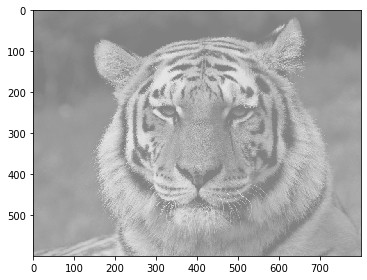

In [2]:
img = imread('tiger-low-contrast.png')
imshow(img)

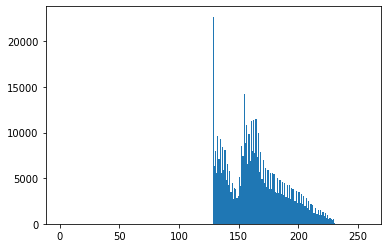

In [3]:
plt.hist(img.ravel(), bins=np.arange(1, 257))
plt.show()

In [4]:
min = img.min()
max = img.max()
min, max

(128, 230)

In [5]:
def linear_correction(img, min, max):
    coef = 255 / (max - min)
    out_img = (img - min) * coef
    return out_img

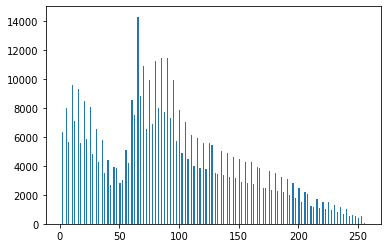

In [6]:
out_img = linear_correction(img, min, max).astype('uint8')
plt.hist(out_img.ravel(), bins=np.arange(1, 257))
plt.show()

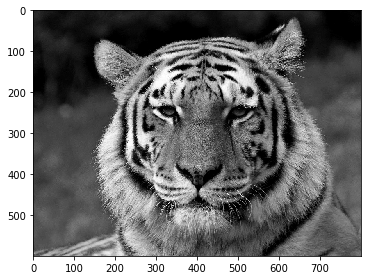

In [7]:
imshow(out_img)

In [8]:
check_img = imread('tiger-high-contrast.png')
np.array_equal(out_img, check_img) 

True

#### Подсчет минимума и максимума устойчивого автоконтраста

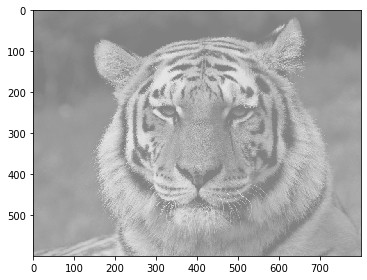

In [9]:
imshow(img)

In [10]:
hist, bin_edges = np.histogram(img.ravel(), bins=np.arange(1, 257))
hist.shape, bin_edges.shape

((255,), (256,))

In [11]:
img_1darray = img.ravel()
len = img_1darray.shape[0]
k = round(0.05 * len)
print(f'Length = {len}, k (5% of length) = {k}')

Length = 480000, k (5% of length) = 24000


In [12]:
%%time
cut_min = bin_edges[:-1][np.cumsum(hist) > k][0]
cut_max = bin_edges[:-1][::-1][np.cumsum(hist[::-1]) > k][0]
cut_min, cut_max

CPU times: user 99 µs, sys: 23 µs, total: 122 µs
Wall time: 132 µs


(129, 208)

Оформим поиск минимума и максимума для устойчивого автоконтраста в отдельный метод.

In [13]:
def cut_min_max(img, procent):
    img_1darray = img.ravel()
    hist, bin_edges = np.histogram(img_1darray, bins=np.arange(1, 257))
    k = round(procent / 100 * img_1darray.shape[0])
    cut_min = bin_edges[:-1][np.cumsum(hist) > k][0]
    cut_max = bin_edges[:-1][::-1][np.cumsum(hist[::-1]) > k][0]
    return cut_min, cut_max

In [14]:
cut_min_max(img, 5)

(129, 208)

Для сравнения времени выполнения код с циклом

In [15]:
from numpy import histogram
from skimage.io import imread

In [16]:
def find(values, k, first, second, step):
    for i in range(first, second, step):
        if values[i] - k > 0:
            return i
        else:
            k -= values[i]

In [17]:
k = round(img.size * 0.05)
values, bin_edges = histogram(img, range(257))

In [18]:
%%time

newmin = find(values, k, img.min(), img.max(), 1)
newmax = find(values, k, img.max(), img.min(), -1)
print(newmin, newmax)


129 208
CPU times: user 5.7 ms, sys: 381 µs, total: 6.08 ms
Wall time: 5.37 ms


#### Устойчивый автоконтраст черно-белого изображения

In [19]:
cut_min, cut_max

(129, 208)

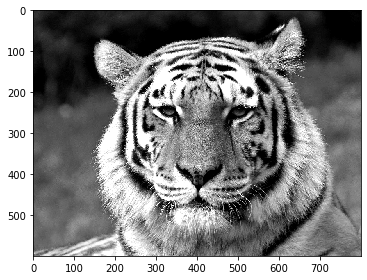

In [20]:
float_img = img.astype('float')
out_img = np.clip(linear_correction(float_img, cut_min, cut_max), 0, 255).astype('uint8')
imshow(out_img)

In [21]:
np.array_equal(out_img, imread('tiger-stable-contrast.png')) 

True

### Коррекция контраста цветного изображения
#### Устойчивый цветной автоконтраст

In [22]:
from skimage import img_as_float, img_as_ubyte

In [23]:
img_color = imread('tiger-color.png')
img_color_float = img_as_float(img_color)
img_color_float

array([[[0.16078431, 0.18039216, 0.02352941],
        [0.1254902 , 0.14509804, 0.        ],
        [0.1254902 , 0.14117647, 0.        ],
        ...,
        [0.00784314, 0.00784314, 0.        ],
        [0.01176471, 0.00784314, 0.        ],
        [0.00784314, 0.00392157, 0.        ]],

       [[0.14117647, 0.16078431, 0.00392157],
        [0.14509804, 0.16470588, 0.00784314],
        [0.15686275, 0.17254902, 0.02745098],
        ...,
        [0.00784314, 0.00784314, 0.        ],
        [0.00784314, 0.00784314, 0.        ],
        [0.00784314, 0.00392157, 0.        ]],

       [[0.14117647, 0.16078431, 0.        ],
        [0.13333333, 0.15294118, 0.        ],
        [0.11372549, 0.12941176, 0.        ],
        ...,
        [0.00784314, 0.00784314, 0.        ],
        [0.00784314, 0.00784314, 0.        ],
        [0.00392157, 0.00392157, 0.        ]],

       ...,

       [[0.60784314, 0.4       , 0.23529412],
        [0.54117647, 0.34901961, 0.18039216],
        [0.54509804, 0

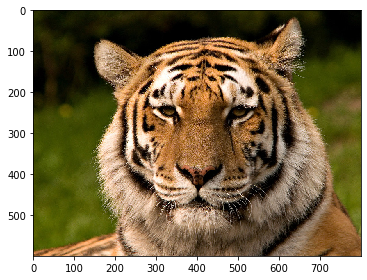

In [24]:
imshow('tiger-color.png')

Y =  0.2126⋅R + 0.7152⋅G + 0.0722⋅B

U = −0.0999⋅R − 0.3360⋅G + 0.4360⋅B

V =  0.6150⋅R − 0.5586⋅G − 0.0563⋅B



In [25]:
red = img_color_float[:, :, 0]
green = img_color_float[:, :, 1]
blue = img_color_float[:, :, 2]

In [26]:
Y = 0.2126 * red + 0.7152 * green + 0.0722 * blue
U = -0.0999 * red - 0.3360 * green + 0.4360 * blue
V = 0.6150 * red - 0.5586 * green - 0.0563 * blue

In [27]:
img_1darray = Y.ravel()
hist, bin_edges = np.histogram(img_1darray, bins=np.arange(0, 1, 0.05))

(array([53662., 37631., 27966., 17640., 27840., 49778., 47670., 41761.,
        28270., 24159., 22058., 19752., 17963., 15903., 14130., 11356.,
         8363.,  6417.,  4882.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 <a list of 19 Patch objects>)

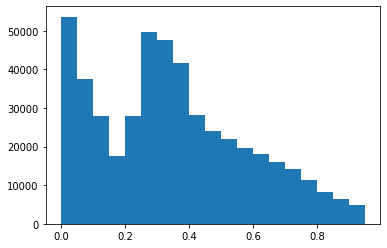

In [28]:
plt.hist(img_1darray, bins=bin_edges)

In [29]:
k = round(5 / 100 * img_1darray.shape[0])
cut_min = bin_edges[:-1][np.cumsum(hist) > k][0]
cut_max = bin_edges[:-1][::-1][np.cumsum(hist[::-1]) > k][0]
cut_min, cut_max

(0.0, 0.75)

In [30]:
coef = 1 / (cut_max - cut_min)
Y_correct = np.clip((Y - cut_min) * coef, 0 , 1)
Y_correct

array([[0.21986405, 0.17393778, 0.17019817, ..., 0.00970248, 0.01081412,
        0.00596288],
       [0.19372026, 0.19894902, 0.21165072, ..., 0.00970248, 0.00970248,
        0.00596288],
       [0.19334275, 0.18364026, 0.15564444, ..., 0.00970248, 0.00970248,
        0.00485124],
       ...,
       [0.57639425, 0.50359634, 0.52790065, ..., 0.65627922, 0.61444915,
        0.54647529],
       [0.49460706, 0.51476706, 0.51027242, ..., 0.56814536, 0.5830766 ,
        0.61444915],
       [0.50244288, 0.53566118, 0.51095843, ..., 0.59951791, 0.61520418,
        0.60399163]])

R = Y + 1.2803⋅V

G = Y − 0.2148⋅U − 0.3805⋅V

B = Y + 2.1279⋅U

In [31]:
new_Red = Y_correct + 1.2803 * V
new_Green = Y_correct - 0.2148 * U - 0.3805 * V
new_Blue = Y_correct + 2.1279 * U

In [32]:
new_img_color_float = np.zeros((*new_Red.shape, 3))
new_img_color_float[:, :, 0] = new_Red
new_img_color_float[:, :, 1] = new_Green
new_img_color_float[:, :, 2] = new_Blue
new_img_color_float

array([[[0.21575504, 0.23535124, 0.07853895],
        [0.16897624, 0.18857729, 0.04352004],
        [0.16804124, 0.18372114, 0.04258425],
        ...,
        [0.01026883, 0.01026853, 0.00242757],
        [0.01446824, 0.01054664, 0.00270557],
        [0.00933383, 0.00541237, 0.00149178]],

       [[0.18960874, 0.20920862, 0.05239098],
        [0.194838  , 0.21443714, 0.05762058],
        [0.20978048, 0.22545507, 0.08040518],
        ...,
        [0.01026883, 0.01026853, 0.00242757],
        [0.01026883, 0.01026853, 0.00242757],
        [0.00933383, 0.00541237, 0.00149178]],

       [[0.18951389, 0.20911436, 0.04837518],
        [0.17924507, 0.19884582, 0.04594761],
        [0.152638  , 0.16831834, 0.0389429 ],
        ...,
        [0.01026883, 0.01026853, 0.00242757],
        [0.01026883, 0.01026853, 0.00242757],
        [0.00513441, 0.00513427, 0.00121378]],

       ...,

       [[0.75197007, 0.5440904 , 0.3794884 ],
        [0.66709718, 0.47491289, 0.30637589],
        [0.67709627, 0

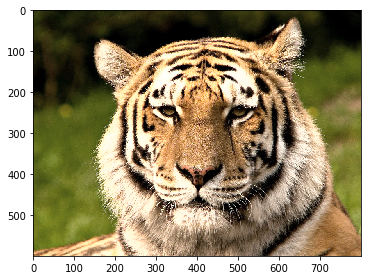

In [33]:
imshow(img_as_ubyte(np.clip(new_img_color_float, 0 ,1)))

#### Преобразование серого мира

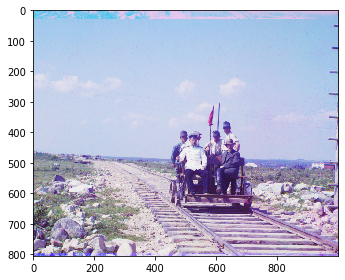

In [34]:
img_railroad = imread('railroad.png')
imshow(img_railroad)

In [35]:
img_railroad_float = img_as_float(img_railroad)
red = img_railroad_float[:, :, 0]
green = img_railroad_float[:, :, 1]
blue = img_railroad_float[:, :, 2]

avg = np.mean([np.mean(red), np.mean(green), np.mean(blue)])

In [36]:
r_w = np.mean(red) / avg
g_w = np.mean(green) / avg
b_w = np.mean(blue) / avg

In [37]:
new_red = red / r_w
new_green = green / g_w
new_blue = blue / b_w

In [38]:
new_img = np.zeros((*new_red.shape, 3))
new_img[:, :, 0] = new_red
new_img[:, :, 1] = new_green
new_img[:, :, 2] = new_blue

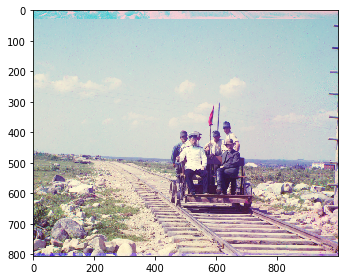

In [39]:
imshow(np.clip(new_img, 0, 1))

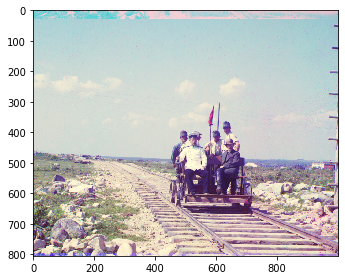

In [40]:
imshow(imread('railroad-gray-world.png'))

In [41]:
np.array_equal(img_as_ubyte(np.clip(new_img, 0, 1)), imread('railroad-gray-world.png'))

True

#### Выравнивание гистограммы

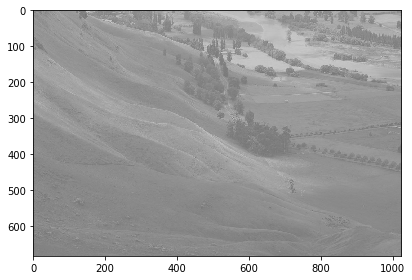

In [42]:
img = imread('landscape.png')
imshow(img)

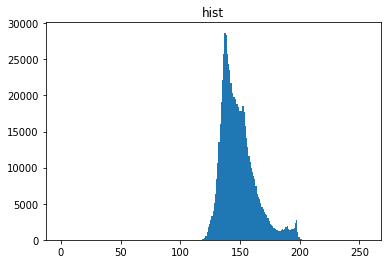

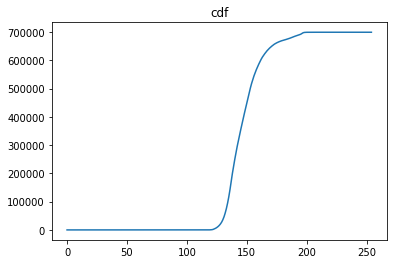

In [43]:
img_1darray = img.ravel()
hist, bin_edges = np.histogram(img_1darray, bins=np.arange(0, 256, 1))
plt.hist(img_1darray, bin_edges)
plt.title('hist')
plt.show()
plt.plot(bin_edges[:-1], np.cumsum(hist))
plt.title('cdf')
plt.show()

In [44]:
cdf = np.cumsum(hist)
cdf_min = cdf[cdf > 0][0]

In [45]:
pixels_count = img_1darray.shape[0]
align = np.round((cdf - cdf_min) / (pixels_count - 1.) * 255)
new_image = np.array(align[img_1darray]).reshape(img.shape).astype('uint8')
new_image

array([[  6, 130, 157, ..., 233, 231, 229],
       [227, 177, 115, ..., 233, 235, 233],
       [237, 130,  91, ..., 199, 189, 170],
       ...,
       [144,  22,  35, ..., 137, 130, 122],
       [137,  13,  22, ..., 137, 130, 122],
       [130,   8,  10, ..., 137, 130, 122]], dtype=uint8)

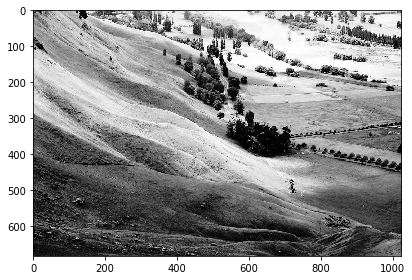

In [46]:
imshow(new_image)

In [47]:
np.array_equal(new_image, imread('landscape-histeq.png'))

True